<a href="https://colab.research.google.com/github/Gladwin-bit/AI-ML-SHIPMENT-SURE/blob/main/AI_ML_PROJECT_SHIPMENT_SURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving Train new.csv to Train new.csv
{'Train new.csv': b'ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N\r\n1,D,Flight,4,2,177,3,low,F,44,1233,1\r\n2,F,Flight,4,5,216,2,low,M,59,3088,1\r\n3,A,Flight,2,2,183,4,low,M,48,3374,1\r\n4,B,Flight,3,3,176,4,medium,M,10,1177,1\r\n5,C,Flight,2,2,184,3,medium,F,46,2484,1\r\n6,F,Flight,3,1,162,3,medium,F,12,1417,1\r\n7,D,Flight,3,4,250,3,low,F,3,2371,1\r\n8,F,Flight,4,1,233,2,low,F,48,2804,1\r\n9,A,Flight,3,4,150,3,low,F,11,1861,1\r\n10,B,Flight,3,2,164,3,medium,F,29,1187,1\r\n11,C,Flight,3,4,189,2,medium,M,12,2888,1\r\n12,F,Flight,4,5,232,3,medium,F,32,3253,1\r\n13,D,Flight,3,5,198,3,medium,F,1,3667,1\r\n14,F,Flight,4,4,275,3,high,M,29,2602,1\r\n15,A,Flight,4,3,152,3,low,M,43,1009,1\r\n16,B,Flight,4,3,227,3,low,F,45,2707,1\r\n17,C,Flight,3,4,143,2,medium,F,6,1194,1\r\n18,F,Ship,5,5,227,3,medium,M,36,3952,1\r\n19

# Task
Finding missing values and deleting duplicate rows

In [ ]:
# Check for missing values
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('Train new.csv')
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values based on data type
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Remove duplicate rows
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_dropping = len(df)

print(f"\nNumber of rows before dropping duplicates: {initial_rows}")
print(f"Number of rows after dropping duplicates: {rows_after_dropping}")

Missing values before imputation:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Missing values after imputation:
ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Number of rows before dropping duplicates: 10999
Number of rows after dropping duplicates: 10999


#Discriptive Statistics

In [ ]:
# Select numerical features relevant to the project
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

# Calculate and display descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
display(df[numerical_features].describe())

# Calculate and display the correlation matrix
print("\nCorrelation Matrix for Numerical Features:")
display(df[numerical_features].corr())

Descriptive Statistics for Numerical Features:


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000



Correlation Matrix for Numerical Features:


,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


# Task
Perform univariate and bivariate analysis on the relevant features of the dataset to understand their relationship with on-time shipment delivery.

In [ ]:
relevant_features = [
    'Warehouse_block',
    'Mode_of_Shipment',
    'Customer_care_calls',
    'Customer_rating',
    'Cost_of_the_Product',
    'Prior_purchases',
    'Product_importance',
    'Discount_offered',
    'Weight_in_gms',
    'Reached.on.Time_Y.N' # Include the target variable
]

print("Identified relevant features for predicting on-time shipment delivery:")
print(relevant_features)

Identified relevant features for predicting on-time shipment delivery:
['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Product_importance', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']


## Univariate analysis
.


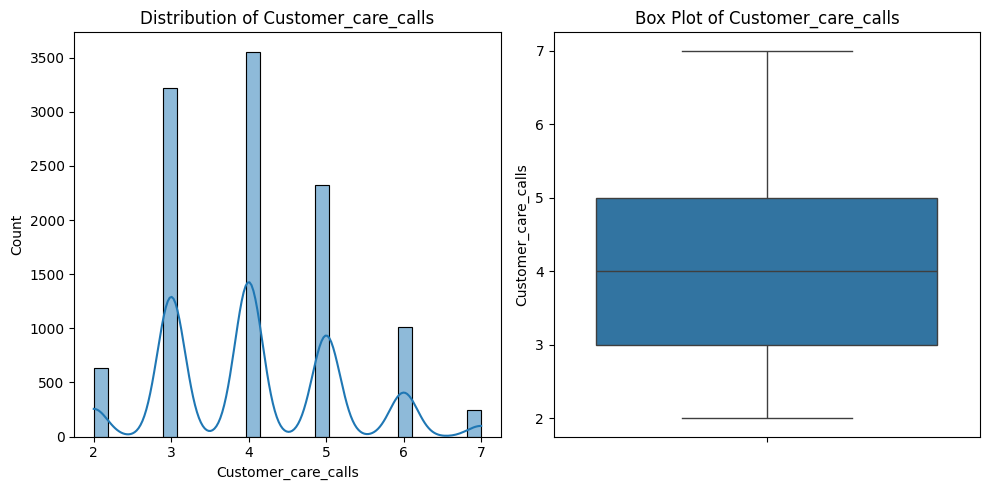

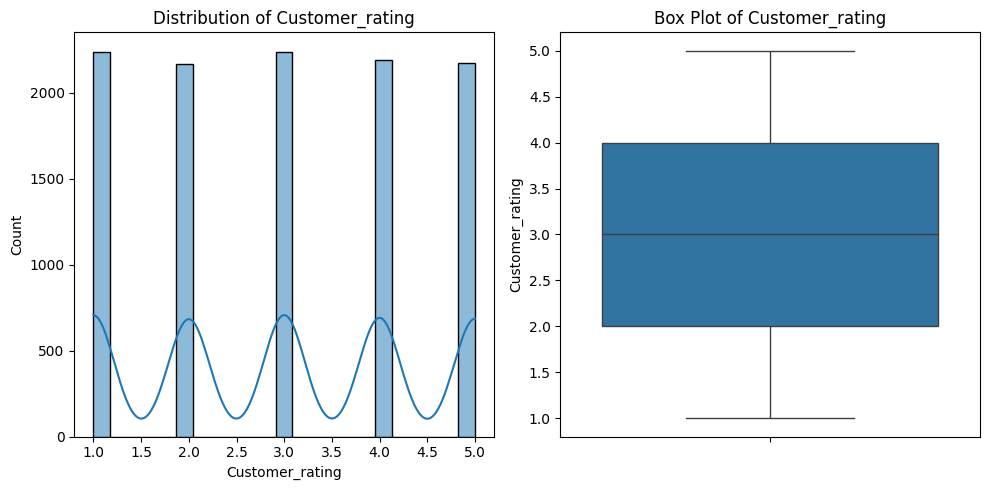

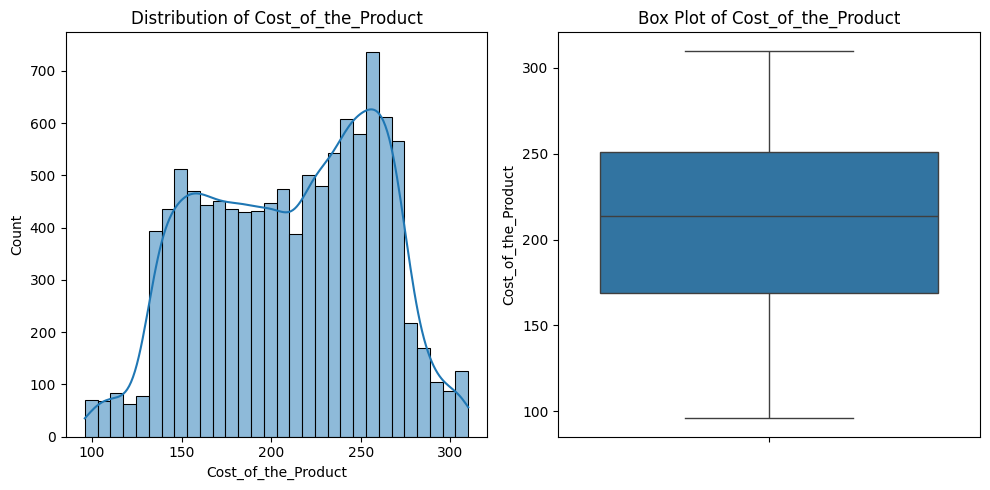

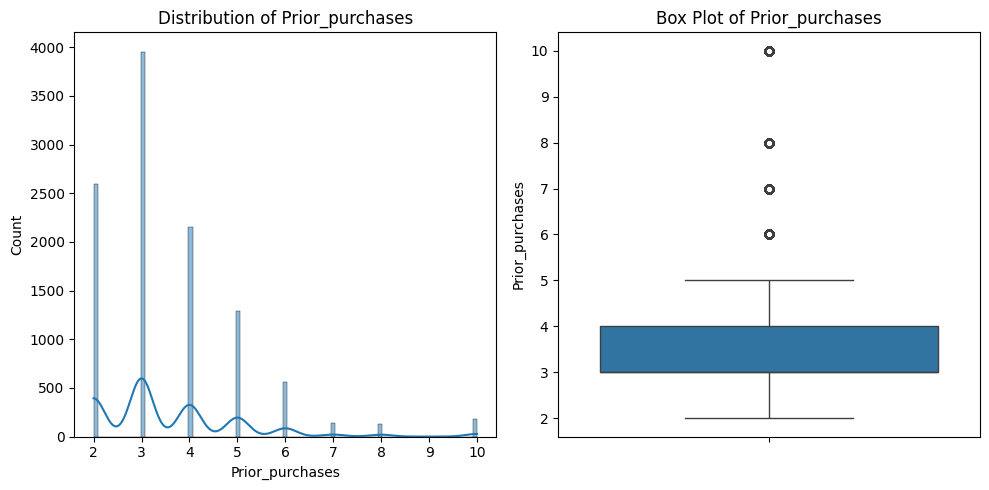

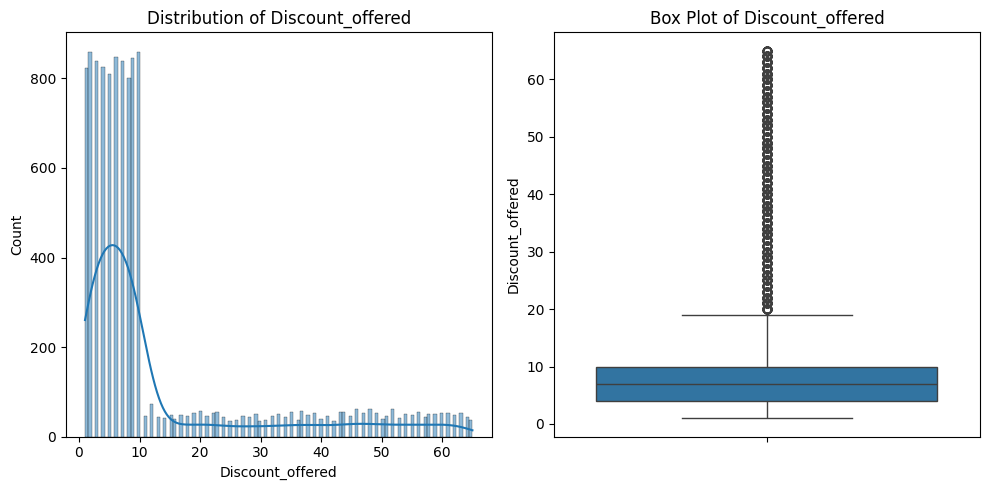

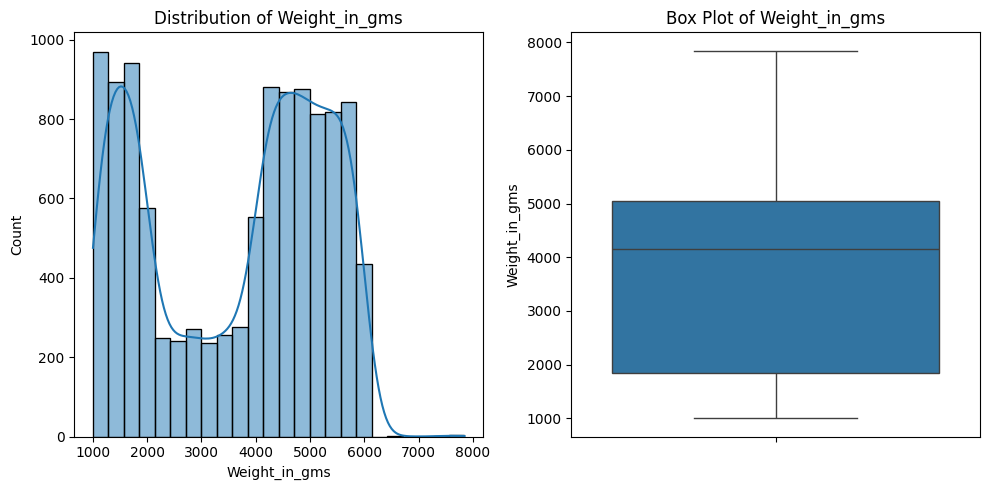

/tmp/ipython-input-287193912.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


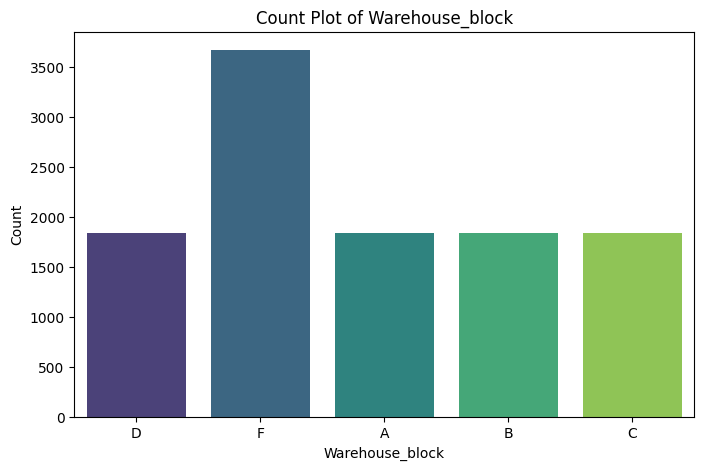

/tmp/ipython-input-287193912.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


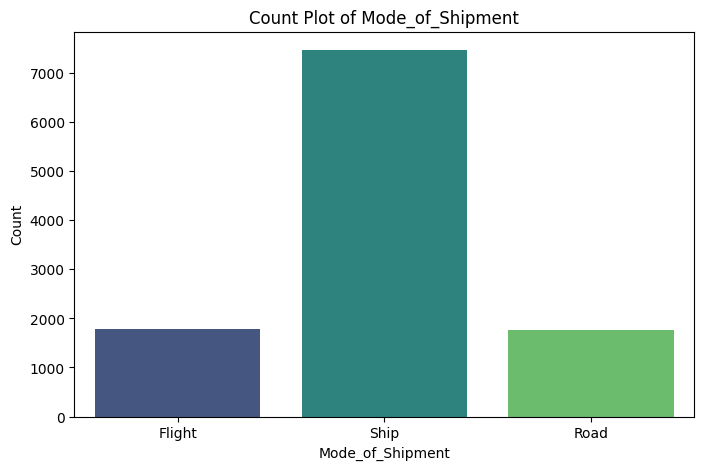

/tmp/ipython-input-287193912.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


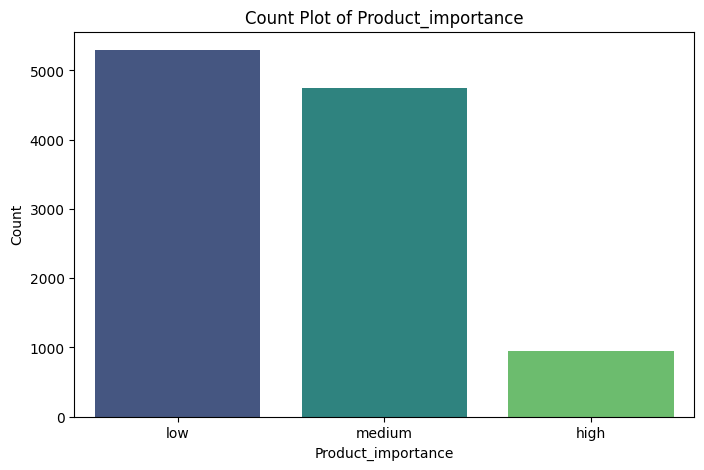

/tmp/ipython-input-287193912.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, palette='viridis')


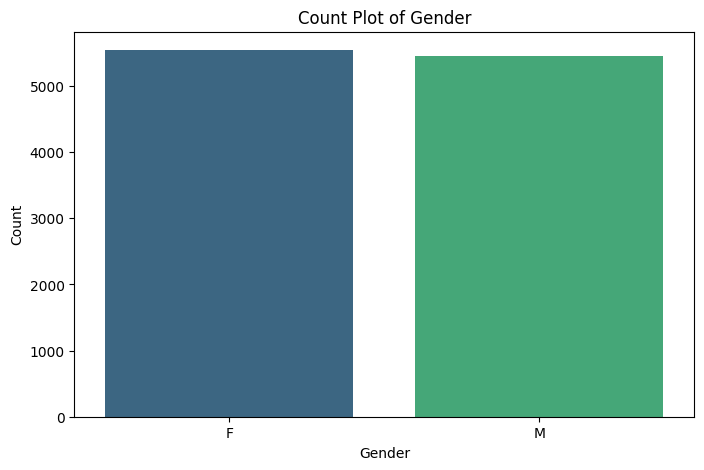

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create lists of numerical and categorical features
numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Univariate analysis for numerical features
for feature in numerical_features:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Box Plot of {feature}')

    plt.tight_layout()
    plt.show()

# Univariate analysis for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

## Bivariate analysis

Performing bivariate analysis to explore the relationship between relevant features and the target variable ('Reached.on.Time_Y.N').


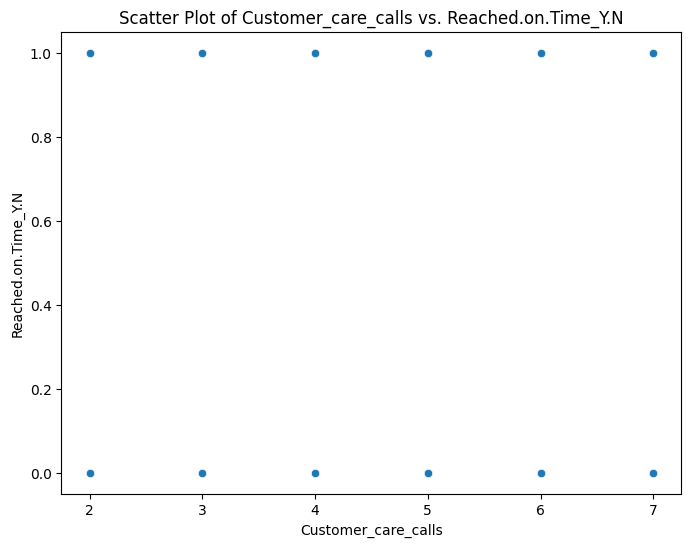

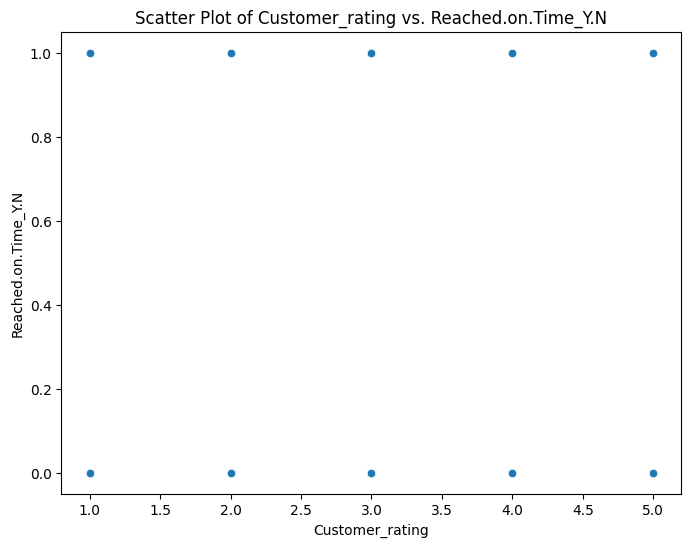

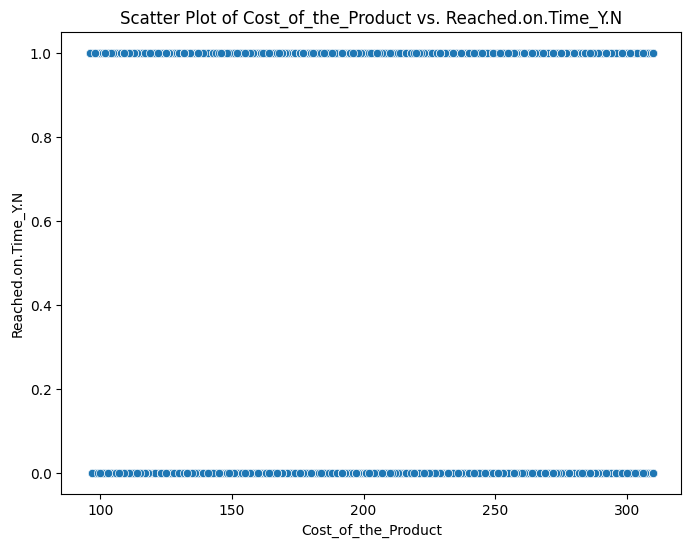

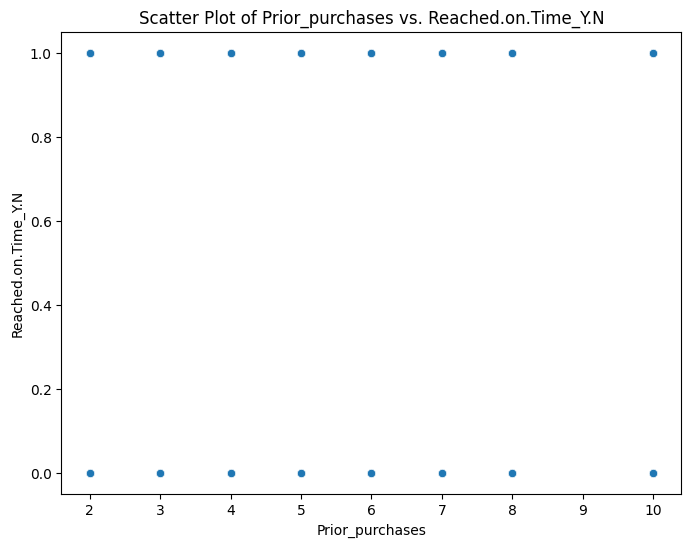

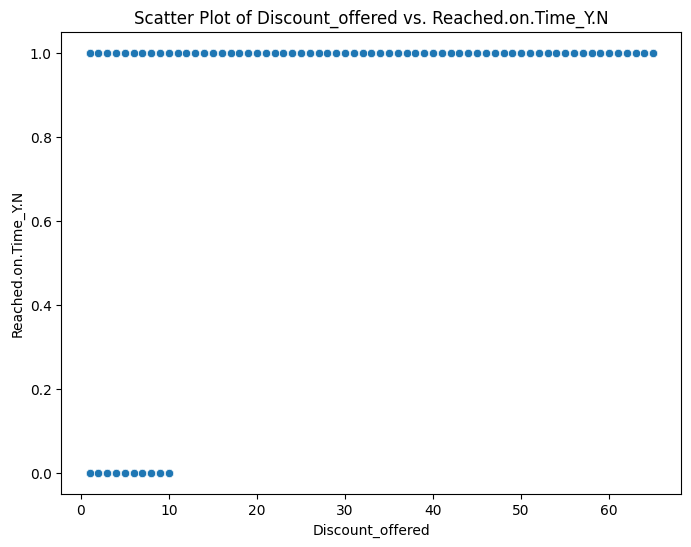

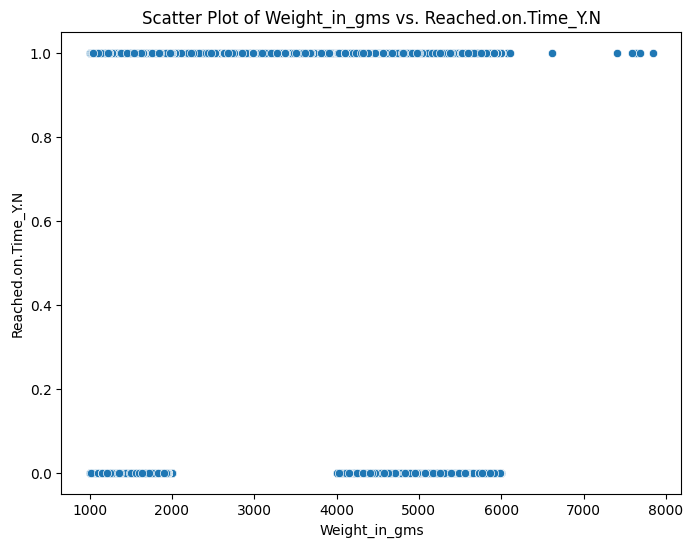

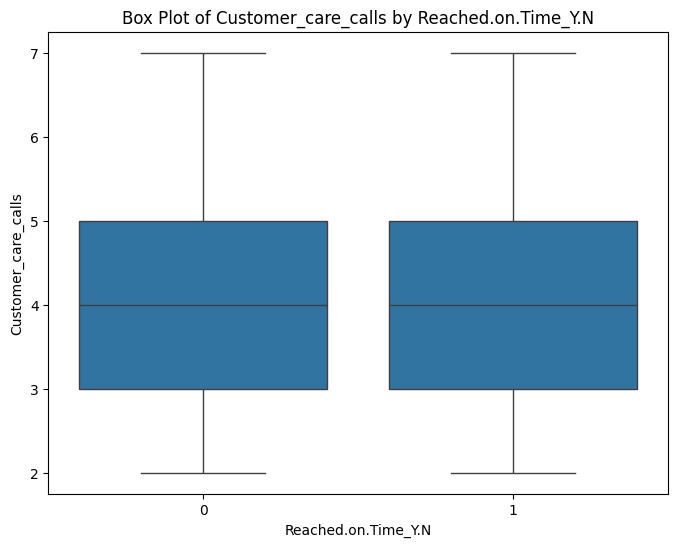

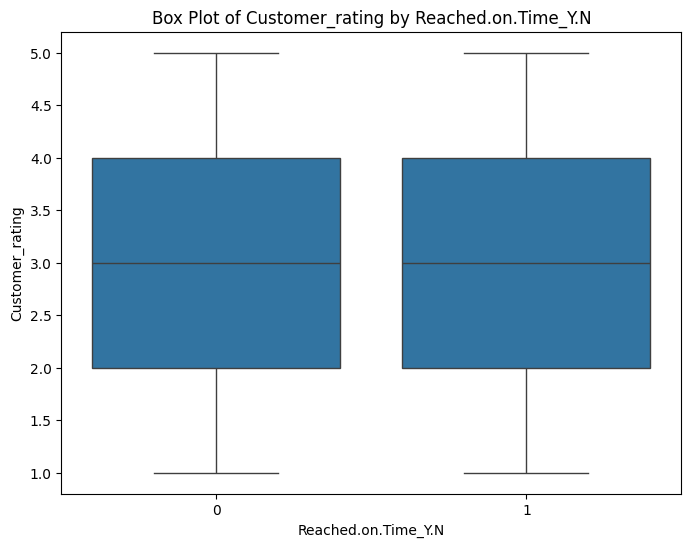

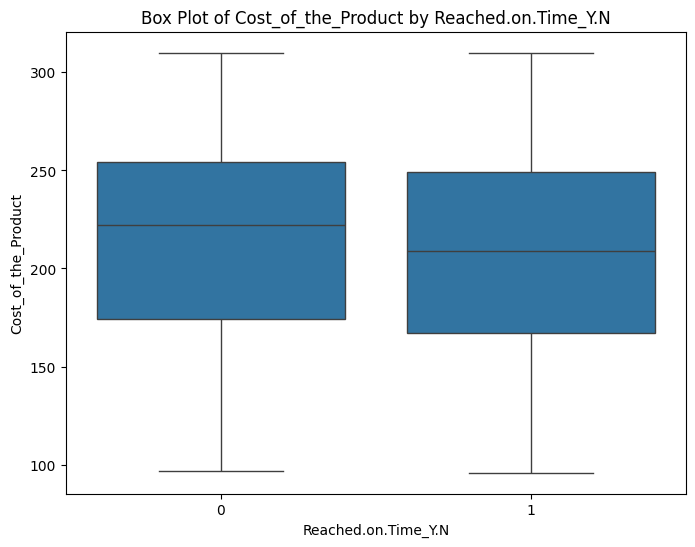

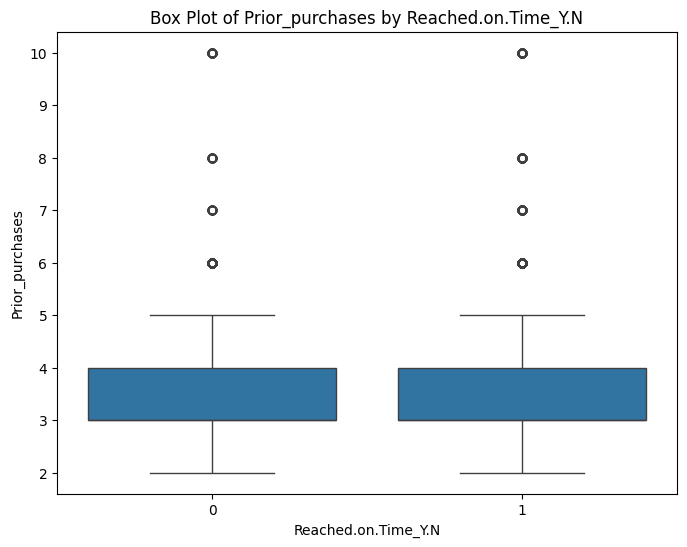

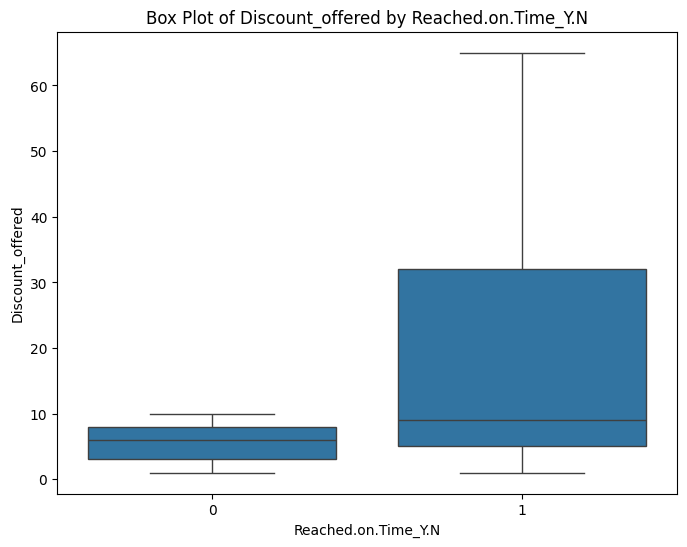

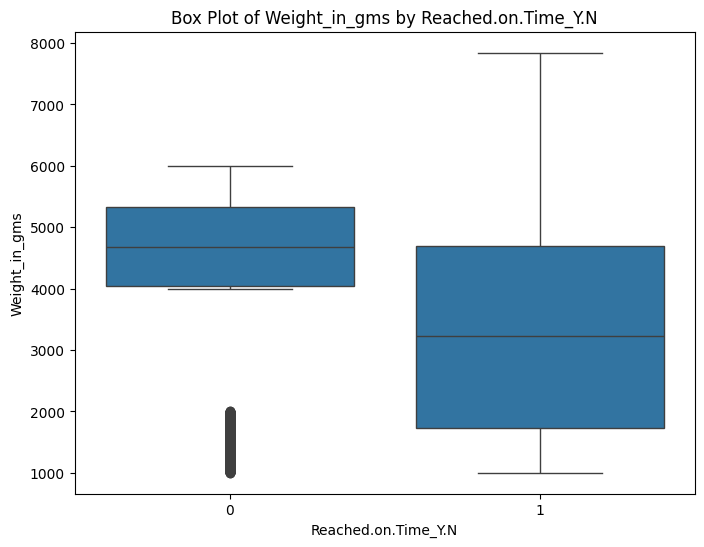

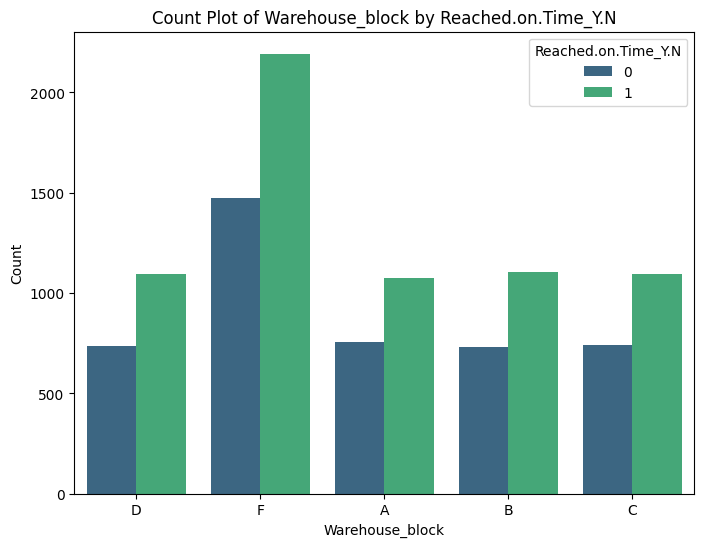

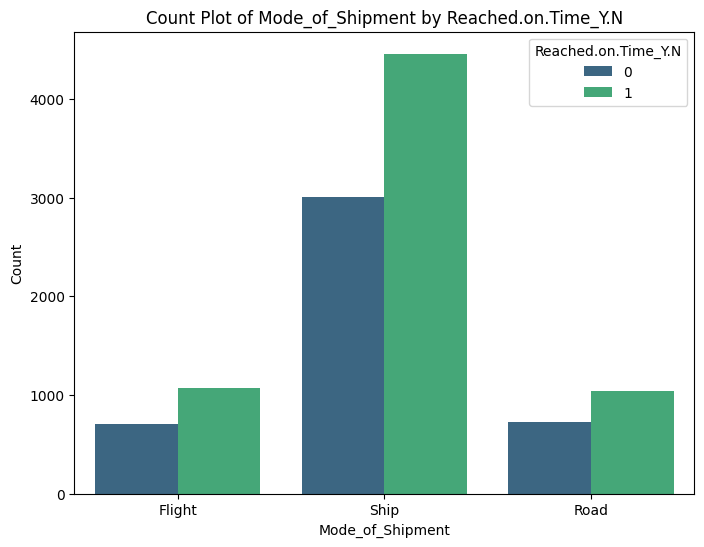

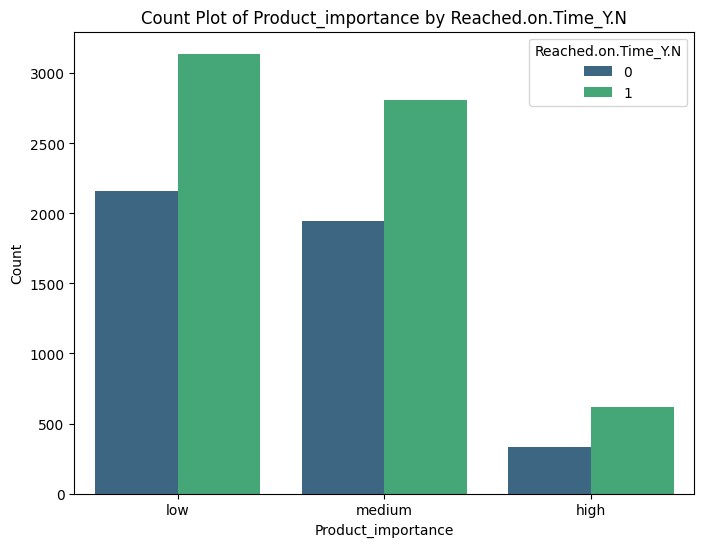

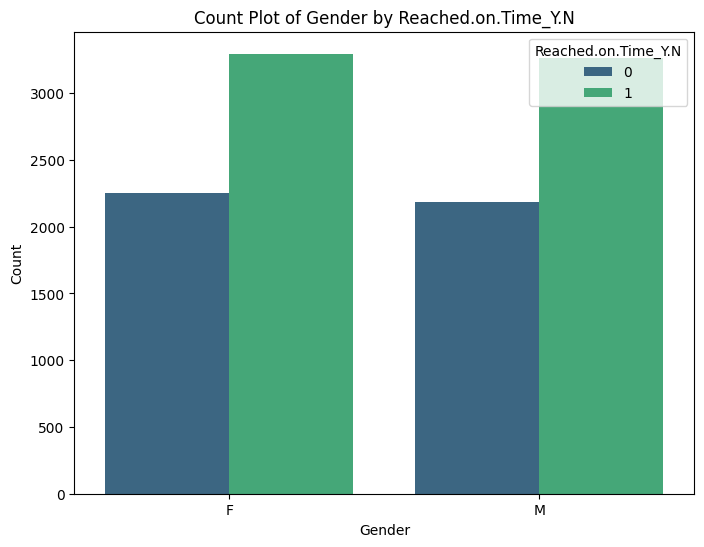

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical_features = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Scatter plots for numerical features vs. Reached.on.Time_Y.N
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='Reached.on.Time_Y.N')
    plt.title(f'Scatter Plot of {feature} vs. Reached.on.Time_Y.N')
    plt.show()

# Box plots for numerical features vs. Reached.on.Time_Y.N
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Reached.on.Time_Y.N', y=feature)
    plt.title(f'Box Plot of {feature} by Reached.on.Time_Y.N')
    plt.show()

# Count plots for categorical features vs. Reached.on.Time_Y.N
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Reached.on.Time_Y.N', palette='viridis')
    plt.title(f'Count Plot of {feature} by Reached.on.Time_Y.N')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

#Class Imbalance


In [89]:
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/AI ML/Train new.csv')

# Calculate the value counts for the 'Reached.on.Time_Y.N' column
class_counts = df['Reached.on.Time_Y.N'].value_counts()

# Calculate the percentage of each class
class_percentages = class_counts / len(df) * 100

# Display the percentages
print("Class distribution for 'Reached.on.Time_Y.N':")
print(class_percentages)

Class distribution for 'Reached.on.Time_Y.N':
Reached.on.Time_Y.N
1    59.669061
0    40.330939
Name: count, dtype: float64


In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['Reached.on.Time_Y.N']==1]
df_minority = df[df['Reached.on.Time_Y.N']==0]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class size
                                 random_state=42) # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
print("Class distribution after oversampling:")
print(df_balanced['Reached.on.Time_Y.N'].value_counts())

Class distribution after oversampling:
Reached.on.Time_Y.N
1    6563
0    6563
Name: count, dtype: int64


#AFTER 1ST REVIEW

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#HEAT MAP


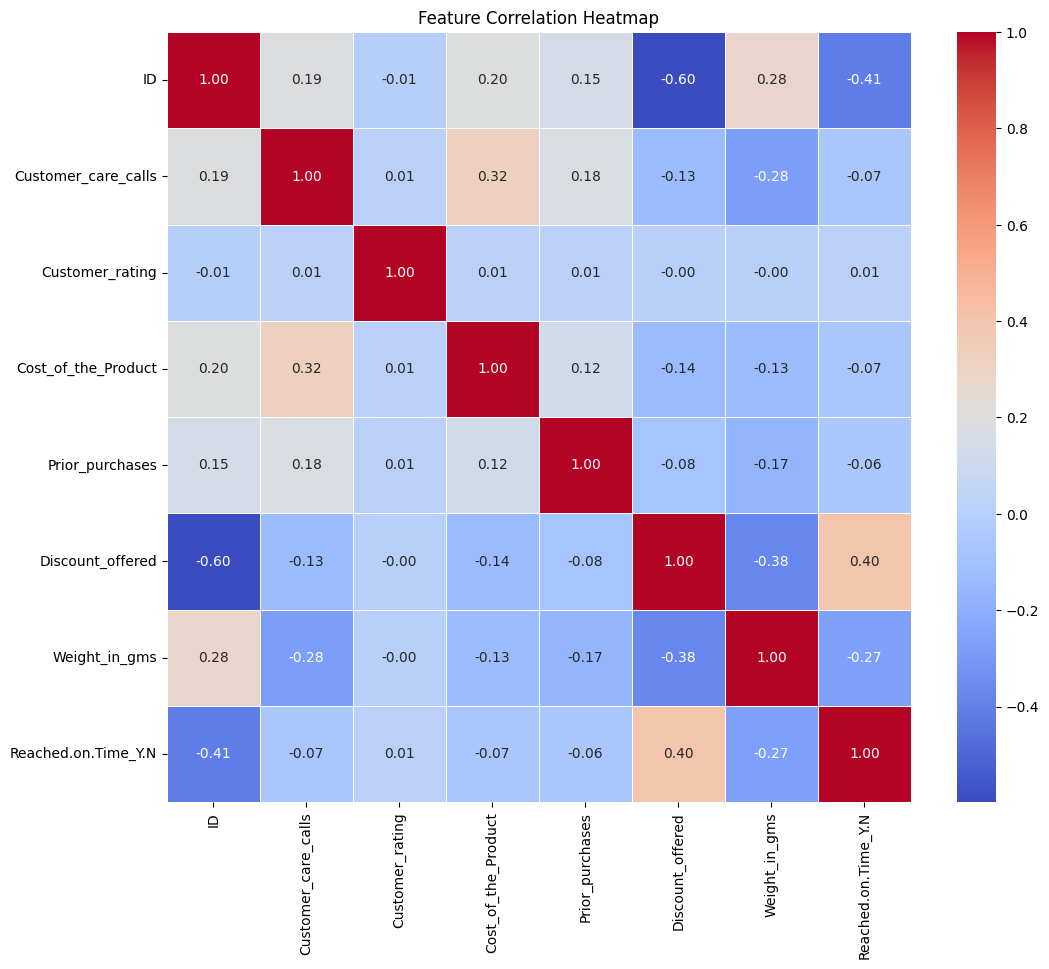

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame from Google Drive
df = pd.read_csv('/content/drive/MyDrive/AI ML/Train new.csv')

# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


enivironment creation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Example: Load CSV dataset
df = pd.read_csv('/content/drive/MyDrive/AI ML/Train new.csv')  # replace with your file path
df.head()


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


handling null values


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())       # Replace numerical NaN with mean
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])  # Replace categorical NaN with mode

print("\n✅ Missing values handled successfully!")

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

✅ Missing values handled successfully!


encode categorical values

In [14]:
# Identify categorical columns in X_train
cat_cols = X_train.select_dtypes(include=['object']).columns

# Using Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


print("✅ Categorical columns encoded successfully!")
X_train.head()

✅ Categorical columns encoded successfully!


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Cost_to_Weight_Ratio
8965,8966,4,2,3,5,178,3,1,0,7,4135,0.043047
5936,5937,0,2,6,3,202,4,2,0,3,4496,0.044929
10656,10657,3,2,2,5,277,3,2,1,6,1032,0.268411
3328,3329,2,2,5,5,219,2,2,1,4,4289,0.051061
9880,9881,2,0,6,3,296,4,1,0,4,1650,0.179394


weight:cost
feature engineering cost:weight

In [ ]:
# Create a new feature 'Cost_to_Weight_Ratio'
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / df['Weight_in_gms']

# Optional: handle any infinite or NaN values
# Safely handle infinite and missing values in Cost_to_Weight_Ratio
import numpy as np
df['Cost_to_Weight_Ratio'] = df['Cost_to_Weight_Ratio'].replace([np.inf, -np.inf], np.nan)
df['Cost_to_Weight_Ratio'] = df['Cost_to_Weight_Ratio'].fillna(df['Cost_to_Weight_Ratio'].mean())

normalize numerical functions


In [15]:
# Identify numerical columns excluding the target variable
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


print("✅ Numerical features normalized successfully!")

✅ Numerical features normalized successfully!


In [16]:
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_to_Weight_Ratio
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.143552
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.069948
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.054238
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.149533
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.074074


splitting training and test data

save preprocessed data

In [10]:
df.to_csv('/content/drive/MyDrive/AI ML/cleaned_shipment_data.csv', index=False)
print("✅ Cleaned data saved successfully!")


✅ Cleaned data saved successfully!


In [13]:
display(df.head())

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_to_Weight_Ratio
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0.143552
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,0.069948
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,0.054238
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,0.149533
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0.074074


duplicate rows

In [ ]:
# Check how many duplicate rows are present
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#AFTER 2ND REVIEW


MODEL DEVELOPMENT

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
# Load cleaned data
df = pd.read_csv('/content/drive/MyDrive/AI ML/cleaned_shipment_data.csv')

# Check shape and columns
print("Dataset Shape:", df.shape)
print("Columns:", df.columns)





Dataset Shape: (10999, 13)
Columns: Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'Cost_to_Weight_Ratio'],
      dtype='object')


SPLIT DATA

In [6]:
# Separate independent (X) and dependent (y) variables BEFORE normalization
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']
#FLOAT TO INT
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N'].astype(int)

# Separate independent (X) and dependent (y) variables
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].round().astype(int)


# Split data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


HELPER FUNCTION FOR MODEL EVALUATION

In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [7]:
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())


y_train value counts:
 Reached.on.Time_Y.N
1    5258
0    3541
Name: count, dtype: int64
y_test value counts:
 Reached.on.Time_Y.N
1    1305
0     895
Name: count, dtype: int64


In [19]:
# Identify categorical columns in X_train
cat_cols = X_train.select_dtypes(include=['object']).columns

# Using Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

print("✅ Categorical columns re-encoded successfully!")

✅ Categorical columns re-encoded successfully!


LOGISTIC REGRESSION

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



📊 Logistic Regression Performance:
Accuracy: 0.656
Precision: 0.732
Recall: 0.669
F1 Score: 0.699
ROC-AUC: 0.653


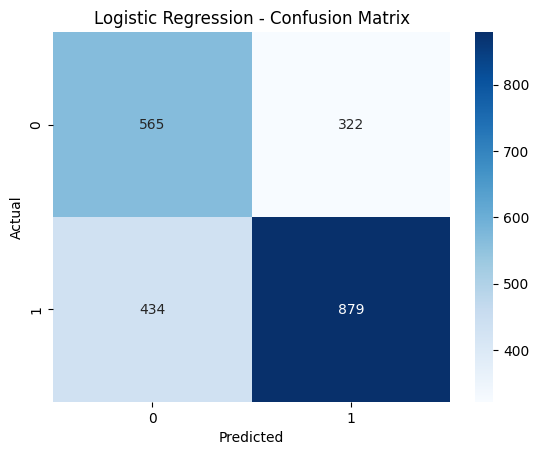

In [ ]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
evaluate_model(log_model, X_test, y_test, "Logistic Regression")




RANDOM FOREST CLASSIFIER


📊 Random Forest Classifier Performance:
Accuracy: 0.665
Precision: 0.793
Recall: 0.595
F1 Score: 0.680
ROC-AUC: 0.682


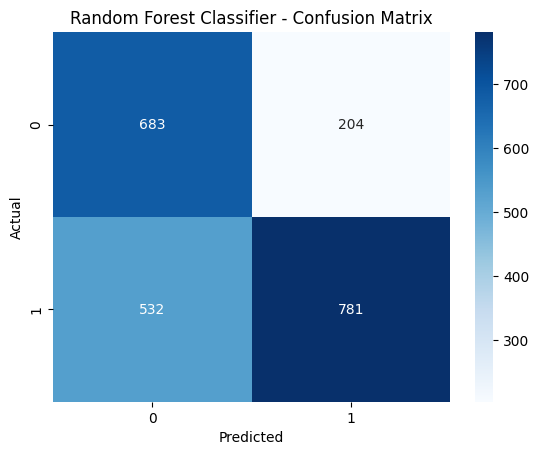

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
evaluate_model(rf_model, X_test, y_test, "Random Forest Classifier")


XGBOOST CLASSIFIER

In [20]:
df['Reached.on.Time_Y.N'] = df['Reached.on.Time_Y.N'].replace(-1, 0)
print(df['Reached.on.Time_Y.N'].unique())

X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(y_train.unique())


[1 0]
[0 1]


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:23:54] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 XGBoost Classifier Performance:
Accuracy: 0.651
Precision: 0.741
Recall: 0.640
F1 Score: 0.687
ROC-AUC: 0.654


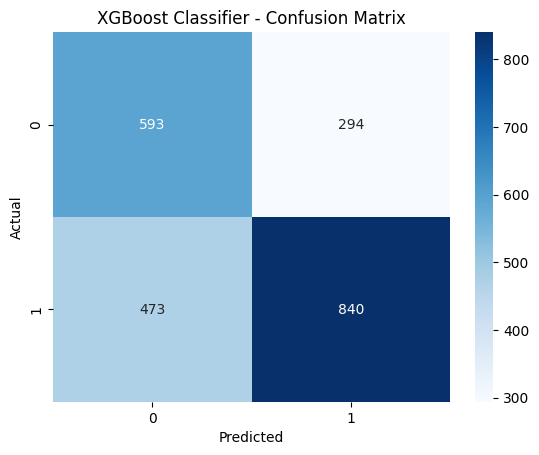

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
evaluate_model(xgb_model, X_test, y_test, "XGBoost Classifier")


Let's re-encode the categorical features to ensure they are in a numerical format suitable for the XGBoost model.

KNN MODEL



### K-Nearest Neighbors (KNN) Classifier


📊 KNN Classifier Performance:
Accuracy: 0.655
Precision: 0.727
Recall: 0.676
F1 Score: 0.700
ROC-AUC: 0.650


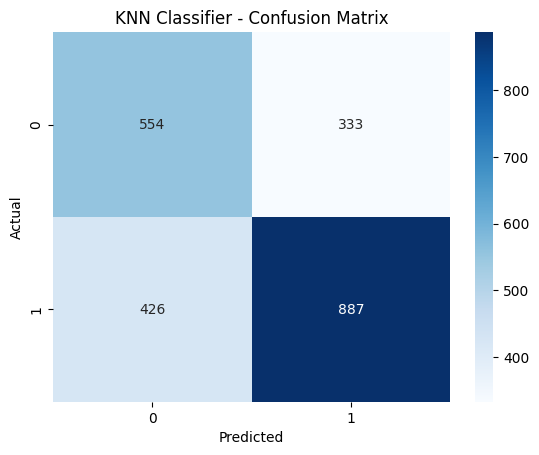

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5) # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)
evaluate_model(knn_model, X_test, y_test, "KNN Classifier")

DECISON TREE MODEL

### Decision Tree Classifier


📊 Decision Tree Classifier Performance:
Accuracy: 0.654
Precision: 0.709
Recall: 0.714
F1 Score: 0.711
ROC-AUC: 0.640


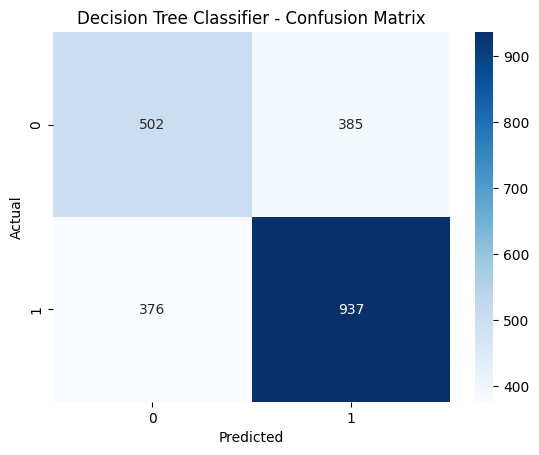

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters
dt_model.fit(X_train, y_train)
evaluate_model(dt_model, X_test, y_test, "Decision Tree Classifier")

COMPARISON

In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost', 'KNN Classifier', 'Decision Tree Classifier'],
    'Accuracy': [0.656, 0.672, 0.651, 0.655, 0.654],
    'Precision': [0.732, 0.782, 0.741, 0.727, 0.709],
    'Recall': [0.669, 0.620, 0.640, 0.676, 0.714],
    'F1 Score': [0.699, 0.692, 0.687, 0.700, 0.711],
    'ROC-AUC': [0.653, 0.684, 0.654, 0.650, 0.640]
})
print(comparison)

                      Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0       Logistic Regression     0.656      0.732   0.669     0.699    0.653
1             Random Forest     0.672      0.782   0.620     0.692    0.684
2                   XGBoost     0.651      0.741   0.640     0.687    0.654
3            KNN Classifier     0.655      0.727   0.676     0.700    0.650
4  Decision Tree Classifier     0.654      0.709   0.714     0.711    0.640


## Feature Selection and Importance


/tmp/ipython-input-1122331982.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')


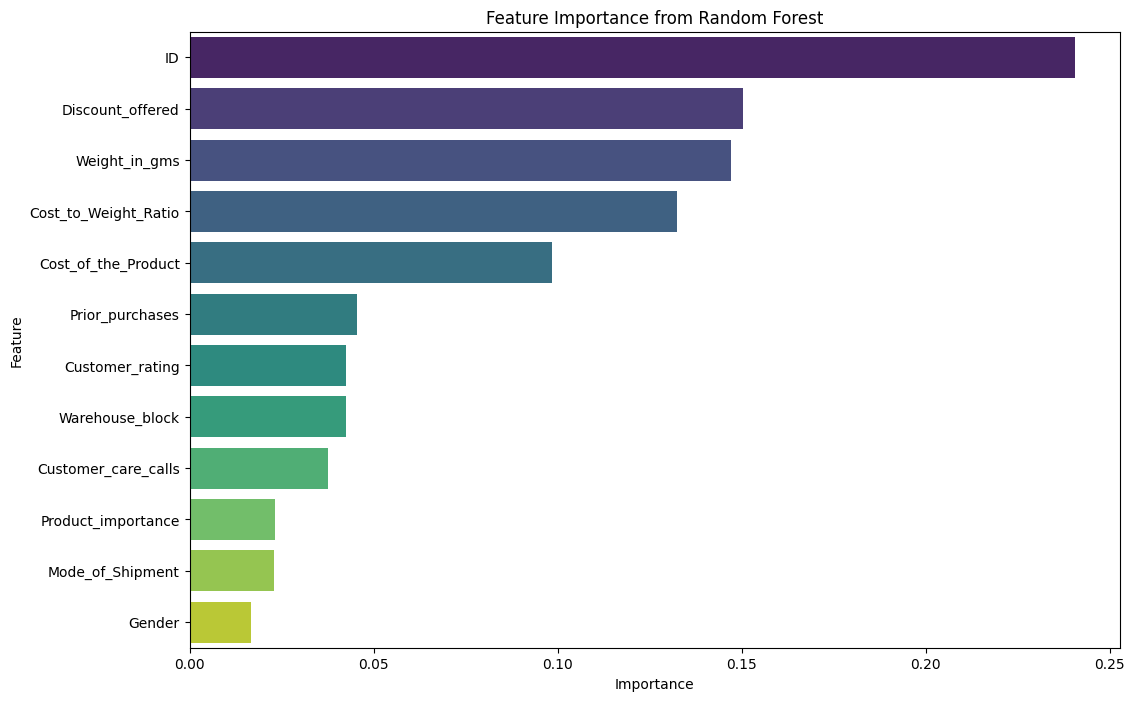

Feature Importances:
                 Feature  Importance
0                     ID    0.240681
9       Discount_offered    0.150384
10         Weight_in_gms    0.147267
11  Cost_to_Weight_Ratio    0.132479
5    Cost_of_the_Product    0.098367
6        Prior_purchases    0.045396
4        Customer_rating    0.042512
1        Warehouse_block    0.042508
3    Customer_care_calls    0.037651
7     Product_importance    0.023126
2       Mode_of_Shipment    0.022925
8                 Gender    0.016703


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize a Random Forest model
# We'll use the resampled training data to fit the model for feature importance
rf_model_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_importance.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = rf_model_importance.feature_importances_

# Create a DataFrame for better visualization
feature_importances_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print("Feature Importances:")
print(feature_importances_df)

## Feature engineering



In [40]:
# Create a new feature 'Cost_to_Weight_Ratio'
df['Cost_to_Weight_Ratio'] = df['Cost_of_the_Product'] / df['Weight_in_gms']

# Handle any infinite or NaN values
import numpy as np
df['Cost_to_Weight_Ratio'] = df['Cost_to_Weight_Ratio'].replace([np.inf, -np.inf], np.nan)
df['Cost_to_Weight_Ratio'] = df['Cost_to_Weight_Ratio'].fillna(df['Cost_to_Weight_Ratio'].mean())

print("✅ 'Cost_to_Weight_Ratio' feature created and handled successfully!")
display(df[['Cost_of_the_Product', 'Weight_in_gms', 'Cost_to_Weight_Ratio']].head())

✅ 'Cost_to_Weight_Ratio' feature created and handled successfully!


,Cost_of_the_Product,Weight_in_gms,Cost_to_Weight_Ratio
0,177,1233,0.143552
1,216,3088,0.069948
2,183,3374,0.054238
3,176,1177,0.149533
4,184,2484,0.074074


In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical features
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

print(" Categorical columns encoded successfully!")

# Identify numerical columns excluding the target variable for scaling
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Reached.on.Time_Y.N')

# Apply StandardScaler to numerical features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(" Numerical features scaled successfully!")

# Display the head of the transformed DataFrame
display(df.head())

✅ Categorical columns encoded successfully!
✅ Numerical features scaled successfully!


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Cost_to_Weight_Ratio
0,-1.731893,0.447189,-2.004158,-0.047711,-0.700755,-0.690722,-0.372735,-0.548034,-0.991760,1.889983,-1.468240,1,1.150475
1,-1.731578,1.118034,-2.004158,-0.047711,1.421578,0.120746,-1.029424,-0.548034,1.008308,2.815636,-0.333893,1,-0.165997
2,-1.731263,-1.565345,-2.004158,-1.799887,-0.700755,-0.565881,0.283954,-0.548034,1.008308,2.136824,-0.159002,1,-0.446982
3,-1.730949,-0.894500,-2.004158,-0.923799,0.006689,-0.711529,0.283954,1.035735,1.008308,-0.208162,-1.502484,1,1.257440
4,-1.730634,-0.223656,-2.004158,-1.799887,-0.700755,-0.545074,-0.372735,1.035735,-0.991760,2.013404,-0.703244,1,-0.092202


## Handling class imbalance




In [42]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Print the value counts of the resampled target variable
print("Class distribution after SMOTE:")
print(y_train_resampled.value_counts())

Class distribution after SMOTE:
Reached.on.Time_Y.N
0    5258
1    5258
Name: count, dtype: int64


## Hyperparameter tuning



Training Logistic Regression...


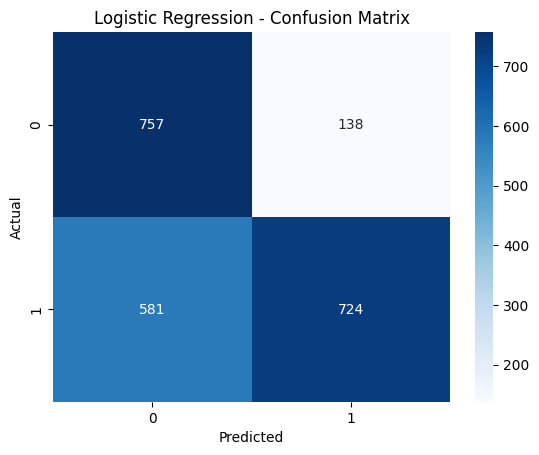

Training Decision Tree...


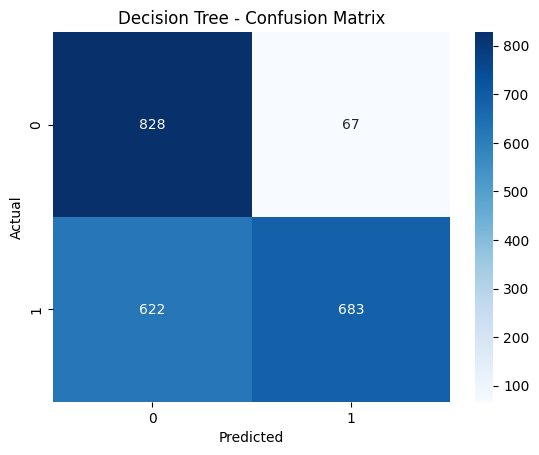

Training Random Forest...


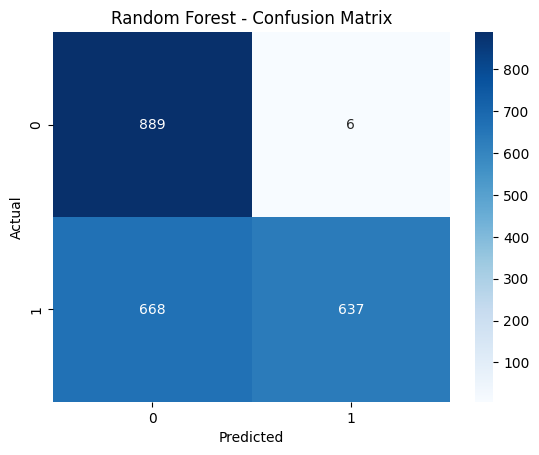

Training Naive Bayes...


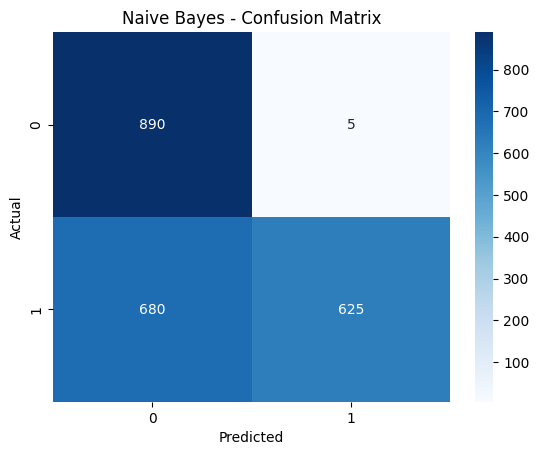

Training KNN...


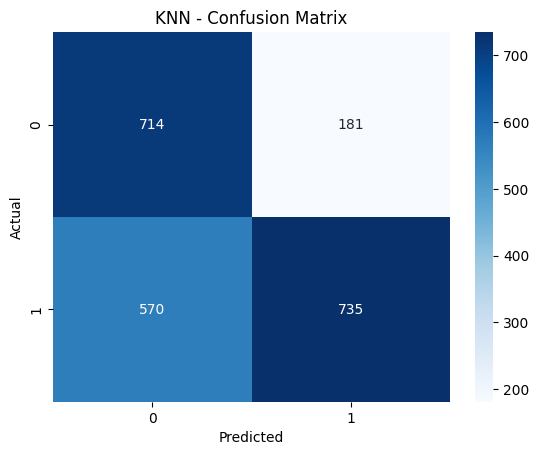

Training SVM...


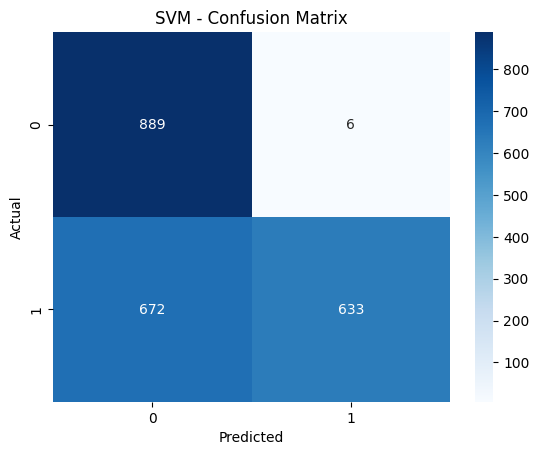

Training XGBoost...


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:23:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


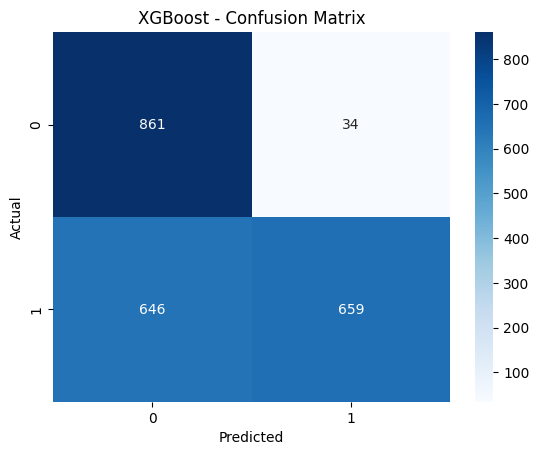

Training LightGBM...
[LightGBM] [Info] Number of positive: 5258, number of negative: 5258
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2412
[LightGBM] [Info] Number of data points in the train set: 10516, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

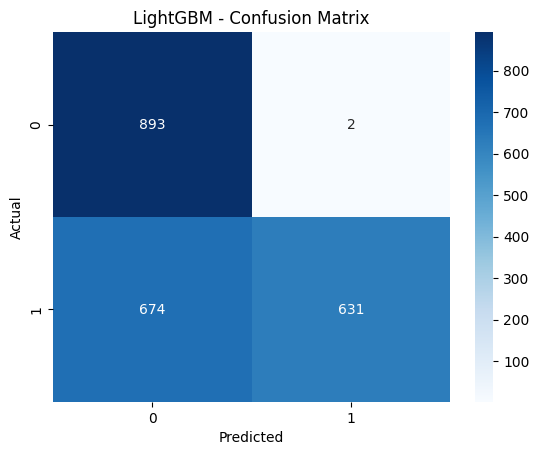

Training CatBoost...


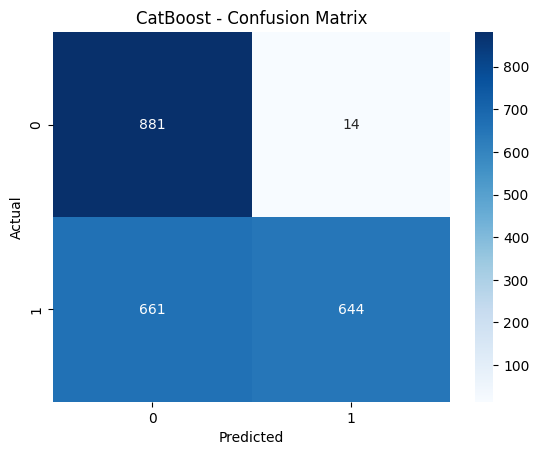


Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
2,Random Forest,0.693636,0.990669,0.488123,0.654004,0.740709
8,CatBoost,0.693182,0.978723,0.493487,0.656139,0.738922
7,LightGBM,0.692727,0.996840,0.483525,0.651187,0.740645
5,SVM,0.691818,0.990610,0.485057,0.651235,0.739177
6,XGBoost,0.690909,0.950938,0.504981,0.659660,0.733496
3,Naive Bayes,0.688636,0.992063,0.478927,0.645995,0.736670
1,Decision Tree,0.686818,0.910667,0.523372,0.664720,0.724256
0,Logistic Regression,0.673182,0.839907,0.554789,0.668205,0.700300
4,KNN,0.658636,0.802402,0.563218,0.661864,0.680492


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define the models with the specified hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

# Create a list to store the performance metrics
model_performance = []

# Iterate through the models, train, and evaluate each one
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)

    # Evaluate the model and store the metrics
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    model_performance.append({
        'Model': model_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    })

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Create a DataFrame from the performance metrics
comparison_df = pd.DataFrame(model_performance)

# Sort by Accuracy for easier comparison
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

print("\nModel Performance Comparison:")
display(comparison_df)